# Уровень 0

In [2]:
import numpy as np
from numpy import linalg as la

In [59]:
a = np.array([[1**0.5,0,0],
              [0,1**0.5,0],
              [0,0,1**0.5]])

at = a.transpose()
a.dot(at)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
b

In [ ]:
c

In [113]:
d = np.array([[1,2],
              [1,3]])

la.det(d)

1.0

In [120]:
m = np.array([[2, 2],
              [1, 3]])

w,v = la.eig(m)
print(f'Собственные значения: {w}\nСобственные векторы: {v}')

Собственные значения: [1. 4.]
Собственные векторы: [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


# Уровень 1

In [61]:
m = np.array([[1,2],
              [2,3]])
m

array([[1, 2],
       [2, 3]])

Спектральное разложение:

А = ST * D * S

D - диагональная матрица из собств значений А

S - ортогональная матрица собств векторов А

ST - транспонированная S

In [66]:
D,S = la.eig(m)
print(f'Собственные значения: {D}')

Собственные значения: [-0.23606798  4.23606798]


In [67]:
print(f'Собственные векторы: {S}')

Собственные векторы: [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [68]:
((S@np.diag(D))@S.T)

array([[1., 2.],
       [2., 3.]])

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

In [115]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt  
from sklearn.metrics import mean_squared_error

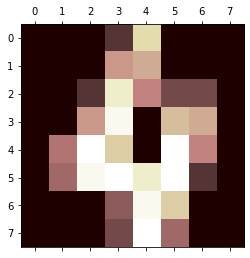

In [87]:
digits = load_digits()
image = digits.images[4]
plt.matshow(image, cmap = 'pink')
plt.show()

In [110]:
i = np.array(image)
i

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

In [94]:
U, d, V = np.linalg.svd(image)
n_component = 1
D = np.diag(d)[:, :n_component]
V = V[:n_component, :]
A1 = U@(D@V)

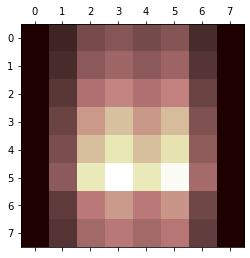

In [93]:
plt.matshow(A1, cmap = 'pink')

In [95]:
U, d, V = np.linalg.svd(image)
n_component = 2
D = np.diag(d)[:, :n_component]
V = V[:n_component, :]
A2 = U@(D@V)

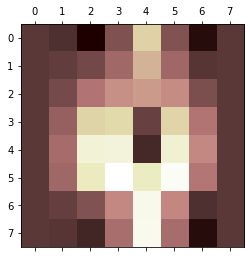

In [96]:
plt.matshow(A2, cmap = 'pink')

In [98]:
U, d, V = np.linalg.svd(image)
n_component = 3
D = np.diag(d)[:, :n_component]
V = V[:n_component, :]
A3 = U@(D@V)

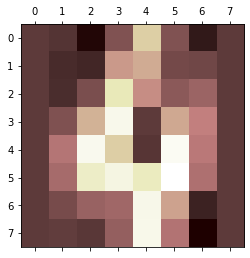

In [99]:
plt.matshow(A3, cmap = 'pink')

In [100]:
U, d, V = np.linalg.svd(image)
n_component = 4
D = np.diag(d)[:, :n_component]
V = V[:n_component, :]
A4 = U@(D@V)

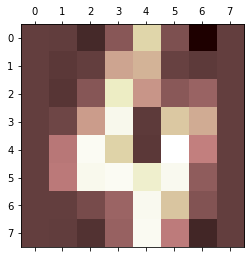

In [101]:
plt.matshow(A4, cmap = 'pink')

In [103]:
U, d, V = np.linalg.svd(image)
n_component = 5
D = np.diag(d)[:, :n_component]
V = V[:n_component, :]
A5 = U@(D@V)

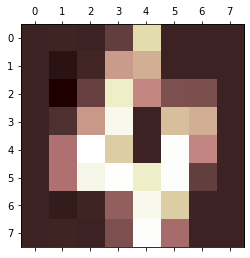

In [104]:
plt.matshow(A5, cmap = 'pink')

In [113]:
U, d, V = np.linalg.svd(image)
n_component = 6
D = np.diag(d)[:, :n_component]
V = V[:n_component, :]
A6 = U@(D@V)

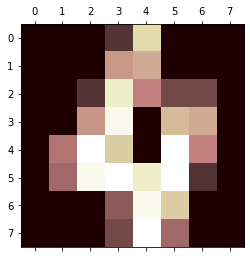

In [114]:
plt.matshow(A6, cmap = 'pink')

In [132]:
y_true = i
y_pred = A6
MSE6 = mean_squared_error(y_true, y_pred)
MSE6

1.383178415607716e-29

In [134]:
y_true = i
y_pred = A5
MSE5 = mean_squared_error(y_true, y_pred)
MSE5

0.01887319033382831

In [135]:
y_true = i
y_pred = A4
MSE4 = mean_squared_error(y_true, y_pred)
MSE4

0.2535777469514026

In [136]:
y_true = i
y_pred = A3
MSE3 = mean_squared_error(y_true, y_pred)
MSE3

0.9085243171679586

In [137]:
y_true = i
y_pred = A2
MSE2 = mean_squared_error(y_true, y_pred)
MSE2

3.7533035472725134

In [133]:
y_true = i
y_pred = A1
MSE1 = mean_squared_error(y_true, y_pred)
MSE1

13.4696594183722

In [138]:
MSE = np.array([MSE1, MSE2, MSE3, MSE4, MSE5, MSE6])
MSE

array([1.34696594e+01, 3.75330355e+00, 9.08524317e-01, 2.53577747e-01,
       1.88731903e-02, 1.38317842e-29])

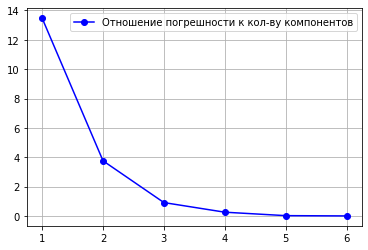

In [146]:
x = [1,2,3,4,5,6]
plt.figure()
plt.plot(x, MSE, 'o-b', label="Отношение погрешности к кол-ву компонентов")
plt.legend()
plt.grid()